In [ ]:
# Step 1: Install necessary packages
# !pip install pandas numpy matplotlib seaborn scikit-learn xgboost openpyxl

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Step 3: Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Airbnb_data.xlsx')
df.head()


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
# Step 2: Initial Data Inspection
print("Data Types:")
print(df.dtypes)

print("\nDataset Summary:")
display(df.info())

print("\nDescriptive Statistics:")
display(df.describe())

Data Types:
id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dt

None


Descriptive Statistics:


,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,0.943520,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,0.163418,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
# Step 3: Handle Missing Values - Identify missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   6
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                         10
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64


In [ ]:
# Step 3: Handle Missing Values - Implement strategy

# Impute numerical columns with the median
for col in ['bathrooms', 'bedrooms', 'beds', 'host_response_rate', 'review_scores_rating']:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Imputed missing values in '{col}' with median: {median_val}")

# Impute categorical columns with mode or 'Unknown'
for col in ['host_has_profile_pic', 'host_identity_verified', 'host_since', 'neighbourhood', 'zipcode']:
     if df[col].isnull().sum() > 0:
        # For host_since, neighbourhood and zipcode, let's impute with a placeholder 'Unknown'
        if col in ['host_since', 'neighbourhood', 'zipcode']:
            df[col].fillna('Unknown', inplace=True)
            print(f"Imputed missing values in '{col}' with 'Unknown'")
        else: # For host_has_profile_pic', 'host_identity_verified', impute with mode
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputed missing values in '{col}' with mode: {mode_val}")


# Drop columns with a large number of missing values or those less relevant for prediction for now
cols_to_drop = ['description', 'name', 'thumbnail_url', 'first_review', 'last_review']
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

# Verify that missing values have been handled
print("\nMissing values after handling:")
print(df.isnull().sum())

Imputed missing values in 'bathrooms' with median: 1.0
Imputed missing values in 'bedrooms' with median: 1.0
Imputed missing values in 'beds' with median: 1.0
Imputed missing values in 'host_response_rate' with median: 1.0
Imputed missing values in 'review_scores_rating' with median: 96.0
Imputed missing values in 'host_has_profile_pic' with mode: t
Imputed missing values in 'host_identity_verified' with mode: t
Imputed missing values in 'host_since' with 'Unknown'
Imputed missing values in 'neighbourhood' with 'Unknown'
Imputed missing values in 'zipcode' with 'Unknown'
Dropped columns: ['description', 'name', 'thumbnail_url', 'first_review', 'last_review']

Missing values after handling:
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                 

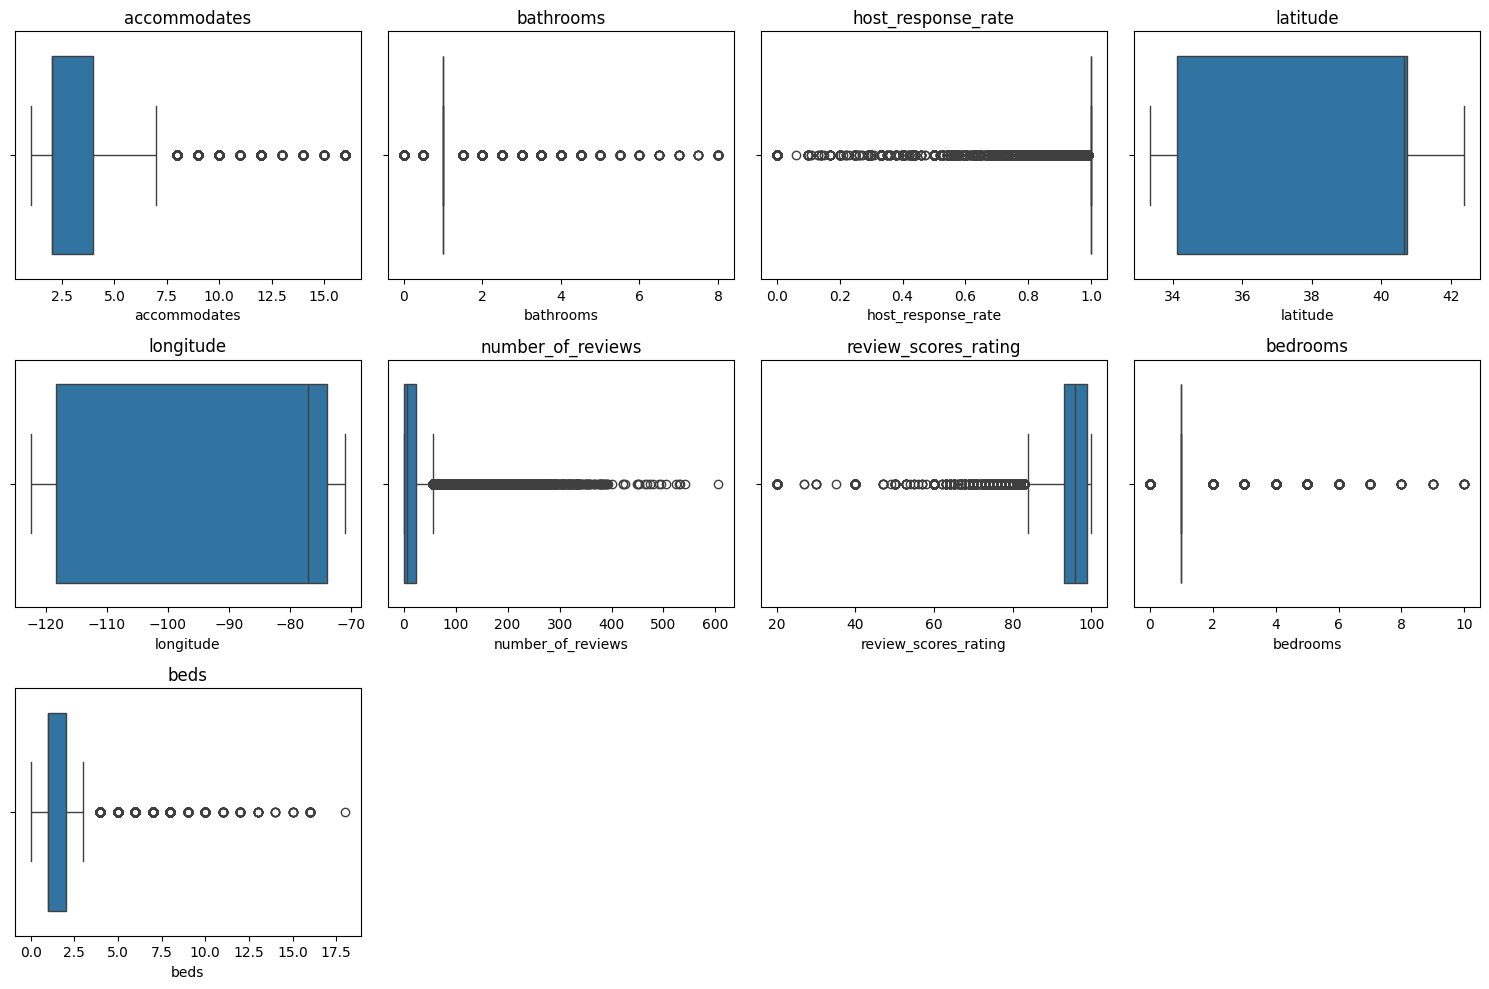

In [ ]:
# Step 4: Handle Outliers - Visualize numerical columns for outliers

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude 'id' and 'log_price' as they are not features we typically check for outliers in this context
numerical_cols.remove('id')
numerical_cols.remove('log_price')

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Handle Outliers - Implement strategy

# Apply log transformation to 'number_of_reviews' (using log1p to handle zeros)
df['number_of_reviews'] = np.log1p(df['number_of_reviews'])
print("Applied log transformation to 'number_of_reviews'")

# Handle outliers in other numerical columns using IQR
numerical_cols_for_iqr = ['accommodates', 'bathrooms', 'beds', 'host_response_rate', 'review_scores_rating', 'latitude', 'longitude', 'bedrooms']

for col in numerical_cols_for_iqr:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print(f"Removed outliers in '{col}' using IQR. New shape: {df.shape}")

print("\nOutlier handling complete.")

Applied log transformation to 'number_of_reviews'
Removed outliers in 'accommodates' using IQR. New shape: (70507, 24)
Removed outliers in 'bathrooms' using IQR. New shape: (57587, 24)
Removed outliers in 'beds' using IQR. New shape: (56465, 24)
Removed outliers in 'host_response_rate' using IQR. New shape: (47246, 24)
Removed outliers in 'review_scores_rating' using IQR. New shape: (43765, 24)
Removed outliers in 'latitude' using IQR. New shape: (43765, 24)
Removed outliers in 'longitude' using IQR. New shape: (43765, 24)
Removed outliers in 'bedrooms' using IQR. New shape: (33722, 24)

Outlier handling complete.


In [ ]:
# Step 5: Feature Engineering

# Engineer 'host_months_active' from 'host_since'
# First, convert 'host_since' to datetime objects. Handle potential errors.
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Calculate months active. Use the current date as the end date.
# We'll fill NaT values (from coercion errors) with a date far in the past
# so the months active calculation results in a large number, indicating old hosts or imputation.
current_date = pd.to_datetime('now')
df['host_since'] = df['host_since'].fillna(pd.to_datetime('1900-01-01')) # Fill NaT with a very old date

df['host_months_active'] = ((current_date - df['host_since']).dt.days / 30.44).astype(int) # Approximate months

print("Engineered 'host_months_active' feature.")

# Engineer binary features for key amenities
# Identify the most common amenities (we can adjust the number)
from collections import Counter
amenities_list = df['amenities'].str.replace('{','').str.replace('}','').str.replace('"','').str.split(',')
all_amenities = [item for sublist in amenities_list for item in sublist if item]
amenity_counts = Counter(all_amenities)

# Select top N amenities as features (adjust N as needed)
top_amenities = [amenity for amenity, count in amenity_counts.most_common(20)] # Top 20 amenities

# Create binary columns for each top amenity
for amenity in top_amenities:
    # Create a clean column name
    col_name = 'amenity_' + amenity.replace(' ', '_').replace('-', '_').lower()
    df[col_name] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
    print(f"Engineered binary feature for '{amenity}'")

# Drop the original 'amenities' column
df.drop(columns=['amenities', 'host_since'], inplace=True) # Drop original 'amenities' and 'host_since'
print("Dropped original 'amenities' and 'host_since' columns.")

print("\nFeature Engineering complete.")
display(df.head())

Engineered 'host_months_active' feature.
Engineered binary feature for 'Wireless Internet'
Engineered binary feature for 'Heating'
Engineered binary feature for 'Kitchen'
Engineered binary feature for 'Essentials'
Engineered binary feature for 'Smoke detector'
Engineered binary feature for 'Air conditioning'
Engineered binary feature for 'TV'
Engineered binary feature for 'Shampoo'
Engineered binary feature for 'Hangers'
Engineered binary feature for 'Carbon monoxide detector'
Engineered binary feature for 'Internet'
Engineered binary feature for 'Laptop friendly workspace'
Engineered binary feature for 'Hair dryer'
Engineered binary feature for 'Washer'
Engineered binary feature for 'Iron'
Engineered binary feature for 'Dryer'
Engineered binary feature for 'Family/kid friendly'
Engineered binary feature for 'translation missing: en.hosting_amenity_50'
Engineered binary feature for 'Fire extinguisher'
Engineered binary feature for 'First aid kit'
Dropped original 'amenities' and 'host_

,id,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,amenity_internet,amenity_laptop_friendly_workspace,amenity_hair_dryer,amenity_washer,amenity_iron,amenity_dryer,amenity_family/kid_friendly,amenity_translation_missing:_en.hosting_amenity_50,amenity_fire_extinguisher,amenity_first_aid_kit
0,6901257,5.010635,Apartment,Entire home/apt,3,1.0,Real Bed,strict,True,NYC,...,1,0,1,0,1,0,1,1,0,0
2,7919400,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,...,1,1,1,0,1,0,1,1,1,0
5,12422935,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,...,1,1,0,0,0,0,0,0,1,1
6,11825529,4.418841,Apartment,Entire home/apt,3,1.0,Real Bed,moderate,True,LA,...,1,1,1,1,0,1,1,0,0,0
7,13971273,4.787492,Condominium,Entire home/apt,2,1.0,Real Bed,moderate,True,LA,...,1,0,1,1,0,1,1,0,0,1


In [ ]:
# Step 6: Data Transformation

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude the target variable 'log_price' from numerical columns to be scaled
if 'log_price' in numerical_cols:
    numerical_cols.remove('log_price')
# Exclude 'id' as it's an identifier and not a feature for scaling
if 'id' in numerical_cols:
    numerical_cols.remove('id')


print(f"Categorical columns to encode: {categorical_cols}")
print(f"Numerical columns to scale: {numerical_cols}")

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)
print("\nApplied One-Hot Encoding to categorical columns.")

# Apply Standard Scaling to numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("Applied Standard Scaling to numerical columns.")

print("\nData Transformation complete.")
display(df.head())

Categorical columns to encode: ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'neighbourhood', 'zipcode']
Numerical columns to scale: ['accommodates', 'bathrooms', 'host_response_rate', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'host_months_active', 'amenity_wireless_internet', 'amenity_heating', 'amenity_kitchen', 'amenity_essentials', 'amenity_smoke_detector', 'amenity_air_conditioning', 'amenity_tv', 'amenity_shampoo', 'amenity_hangers', 'amenity_carbon_monoxide_detector', 'amenity_internet', 'amenity_laptop_friendly_workspace', 'amenity_hair_dryer', 'amenity_washer', 'amenity_iron', 'amenity_dryer', 'amenity_family/kid_friendly', 'amenity_translation_missing:_en.hosting_amenity_50', 'amenity_fire_extinguisher', 'amenity_first_aid_kit']

Applied One-Hot Encoding to categorical columns.
Applied Standard Scaling to numerical columns.

Data Tr

,id,log_price,accommodates,bathrooms,cleaning_fee,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,...,zipcode_60660-1448,zipcode_90034-2203,zipcode_90035-4475,zipcode_90036-2514,zipcode_90039-2715,zipcode_90403-2638,zipcode_91001-2243,zipcode_95202\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n94158,zipcode_Near 91304,zipcode_Unknown
0,6901257,5.010635,0.730570,0.0,True,0.0,0.687814,0.791441,-0.538858,1.173234,...,False,False,False,False,False,False,False,False,False,False
2,7919400,4.976734,2.755496,0.0,True,0.0,0.724977,0.793668,0.289149,-1.322432,...,False,False,False,False,False,False,False,False,False,False
5,12422935,4.442651,-0.281894,0.0,True,0.0,-0.292452,-1.462599,-0.355524,1.173234,...,False,False,False,False,False,False,False,False,False,False
6,11825529,4.418841,0.730570,0.0,True,0.0,-1.548927,-1.278009,0.527933,0.237359,...,False,False,False,False,False,False,False,False,False,False
7,13971273,4.787492,-0.281894,0.0,True,0.0,-1.526852,-1.268592,0.228409,-1.010474,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Step 7: Model Development - Split data

# Define features (X) and target (y)
X = df.drop('log_price', axis=1)
y = df['log_price']

# Split data into training and testing sets
# We'll use a common split ratio, e.g., 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data split into training and testing sets.
Training features shape: (26977, 1276)
Testing features shape: (6745, 1276)
Training target shape: (26977,)
Testing target shape: (6745,)


## Train and evaluate initial models
Train one or two initial regression models (XGBoost, Random Forest) using default parameters and evaluate their performance using metrics like RMSE, MAE, and R². This provides baseline performance.


In [38]:
# Step 7: Model Development - Train initial models and evaluate

# 1. Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42) # Added random_state for reproducibility

# 2. Train the XGBoost model
xgb_model.fit(X_train, y_train)
print("Trained XGBoost model.")

# 3. Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# 4. Calculate evaluation metrics for XGBoost
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Baseline Performance:")
print(f"  MSE: {mse_xgb:.4f}")
print(f"  RMSE: {rmse_xgb:.4f}")
print(f"  MAE: {mae_xgb:.4f}")
print(f"  R-squared: {r2_xgb:.4f}")

# 5. Initialize Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# 6. Train the Random Forest model
rf_model.fit(X_train, y_train)
print("\nTrained Random Forest model.")

# 7. Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# 8. Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Baseline Performance:")
print(f"  MSE: {mse_rf:.4f}")
print(f"  RMSE: {rmse_rf:.4f}")
print(f"  MAE: {mae_rf:.4f}")
print(f"  R-squared: {r2_rf:.4f}")

# 9. Print summary comparison (already done in steps 4 and 8, but re-iterate)
print("\n--- Baseline Model Comparison ---")
print(f"XGBoost: RMSE={rmse_xgb:.4f}, MAE={mae_xgb:.4f}, R2={r2_xgb:.4f}")
print(f"Random Forest: RMSE={rmse_rf:.4f}, MAE={mae_rf:.4f}, R2={r2_rf:.4f}")

Trained XGBoost model.

XGBoost Baseline Performance:
  MSE: 0.1416
  RMSE: 0.3763
  MAE: 0.2732
  R-squared: 0.5812

Trained Random Forest model.

Random Forest Baseline Performance:
  MSE: 0.1440
  RMSE: 0.3795
  MAE: 0.2719
  R-squared: 0.5740

--- Baseline Model Comparison ---
XGBoost: RMSE=0.3763, MAE=0.2732, R2=0.5812
Random Forest: RMSE=0.3795, MAE=0.2719, R2=0.5740


**Next Step**:
Implement hyperparameter tuning for both XGBoost and Random Forest models using GridSearchCV as requested in the instructions. This involves defining parameter grids, initializing GridSearchCV objects, fitting them to the training data, and printing the best parameters for each model.



In [39]:
# Step 8: Model Tuning - Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. Define hyperparameter grid for XGBoost Regressor
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 2. Initialize GridSearchCV for XGBoost
# Using cv=3 for faster execution, can be increased to 5 or more for more robust tuning
grid_search_xgb = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid_xgb,
                               scoring='neg_mean_squared_error',
                               cv=3,
                               verbose=1,
                               n_jobs=-1)

# 3. Fit GridSearchCV for XGBoost
print("Starting GridSearchCV for XGBoost...")
grid_search_xgb.fit(X_train, y_train)
print("GridSearchCV for XGBoost finished.")

# 4. Print the best parameters for XGBoost
print("\nBest parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# 5. Define hyperparameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 6. Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              scoring='neg_mean_squared_error',
                              cv=3,
                              verbose=1,
                              n_jobs=-1)

# 7. Fit GridSearchCV for Random Forest
print("\nStarting GridSearchCV for Random Forest...")
grid_search_rf.fit(X_train, y_train)
print("GridSearchCV for Random Forest finished.")

# 8. Print the best parameters for Random Forest
print("\nBest parameters for Random Forest:")
print(grid_search_rf.best_params_)

Starting GridSearchCV for XGBoost...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
GridSearchCV for XGBoost finished.

Best parameters for XGBoost:
{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Starting GridSearchCV for Random Forest...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
GridSearchCV for Random Forest finished.

Best parameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


**Next Step**:
Evaluate the performance of the tuned models on the test set using the chosen metrics.



In [40]:
# Step 9: Evaluate Tuned Models

# Retrieve the best estimators
best_xgb_model = grid_search_xgb.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

# 1. Evaluate Tuned XGBoost Model
print("Evaluating Tuned XGBoost Model:")
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

mse_tuned_xgb = mean_squared_error(y_test, y_pred_tuned_xgb)
rmse_tuned_xgb = np.sqrt(mse_tuned_xgb)
mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)

print(f"  Tuned XGBoost Performance:")
print(f"    MSE: {mse_tuned_xgb:.4f}")
print(f"    RMSE: {rmse_tuned_xgb:.4f}")
print(f"    MAE: {mae_tuned_xgb:.4f}")
print(f"    R-squared: {r2_tuned_xgb:.4f}")

# 2. Evaluate Tuned Random Forest Model
print("\nEvaluating Tuned Random Forest Model:")
y_pred_tuned_rf = best_rf_model.predict(X_test)

mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print(f"  Tuned Random Forest Performance:")
print(f"    MSE: {mse_tuned_rf:.4f}")
print(f"    RMSE: {rmse_tuned_rf:.4f}")
print(f"    MAE: {mae_tuned_rf:.4f}")
print(f"    R-squared: {r2_tuned_rf:.4f}")

print("\n--- Tuned Model Comparison ---")
print(f"Tuned XGBoost: RMSE={rmse_tuned_xgb:.4f}, MAE={mae_tuned_xgb:.4f}, R2={r2_tuned_xgb:.4f}")
print(f"Tuned Random Forest: RMSE={rmse_tuned_rf:.4f}, MAE={mae_tuned_rf:.4f}, R2={r2_tuned_rf:.4f}")

Evaluating Tuned XGBoost Model:
  Tuned XGBoost Performance:
    MSE: 0.1409
    RMSE: 0.3753
    MAE: 0.2734
    R-squared: 0.5833

Evaluating Tuned Random Forest Model:
  Tuned Random Forest Performance:
    MSE: 0.1425
    RMSE: 0.3775
    MAE: 0.2709
    R-squared: 0.5784

--- Tuned Model Comparison ---
Tuned XGBoost: RMSE=0.3753, MAE=0.2734, R2=0.5833
Tuned Random Forest: RMSE=0.3775, MAE=0.2709, R2=0.5784


**Next Step**:
Print the evaluation metrics for all four models and create a comparison summary to identify the best performing model.



In [48]:
# Step 10: Compare Model Performance

print("--- Model Performance Comparison ---")

# Print metrics for Initial XGBoost
print(f"Initial XGBoost:   RMSE={rmse_xgb:.4f}, MAE={mae_xgb:.4f}, R2={r2_xgb:.4f}")

# Print metrics for Tuned XGBoost
print(f"Tuned XGBoost:     RMSE={rmse_tuned_xgb:.4f}, MAE={mae_tuned_xgb:.4f}, R2={r2_tuned_xgb:.4f}")

# Print metrics for Initial Random Forest
print(f"Initial Random Forest: RMSE={rmse_rf:.4f}, MAE={mae_rf:.4f}, R2={r2_rf:.4f}")

# Print metrics for Tuned Random Forest
print(f"Tuned Random Forest:   RMSE={rmse_tuned_rf:.4f}, MAE={mae_tuned_rf:.4f}, R2={r2_tuned_rf:.4f}")

# Create a summary table (using a DataFrame for better readability)
performance_summary = pd.DataFrame({
    'Model': ['Initial XGBoost', 'Tuned XGBoost', 'Initial Random Forest', 'Tuned Random Forest'],
    'RMSE': [rmse_xgb, rmse_tuned_xgb, rmse_rf, rmse_tuned_rf],
    'MAE': [mae_xgb, mae_tuned_xgb, mae_rf, mae_tuned_rf],
    'R2': [r2_xgb, r2_tuned_xgb, r2_rf, r2_tuned_rf]
})

print("\n--- Performance Summary Table ---")
display(performance_summary)

# Identify the best performing model based on RMSE (lower is better) and R2 (higher is better)
# We can consider a combination, but RMSE is a common primary metric for regression.
# Let's primarily focus on RMSE for identifying the "best" model in this summary.
best_model_row = performance_summary.loc[performance_summary['RMSE'].idxmin()]

print("\n--- Best Performing Model (based on lowest RMSE) ---")
print(best_model_row)

# Also consider R2 as a key metric
best_r2_model_row = performance_summary.loc[performance_summary['R2'].idxmax()]

print("\n--- Best Performing Model (based on highest R2) ---")
print(best_r2_model_row)


--- Model Performance Comparison ---
Initial XGBoost:   RMSE=0.3763, MAE=0.2732, R2=0.5812
Tuned XGBoost:     RMSE=0.3753, MAE=0.2734, R2=0.5833
Initial Random Forest: RMSE=0.3795, MAE=0.2719, R2=0.5740
Tuned Random Forest:   RMSE=0.3775, MAE=0.2709, R2=0.5784

--- Performance Summary Table ---


,Model,RMSE,MAE,R2
0,Initial XGBoost,0.376270,0.273159,0.581229
1,Tuned XGBoost,0.375323,0.273385,0.583335
2,Initial Random Forest,0.379497,0.271893,0.574015
3,Tuned Random Forest,0.377537,0.270945,0.578404



--- Best Performing Model (based on lowest RMSE) ---
Model    Tuned XGBoost
RMSE          0.375323
MAE           0.273385
R2            0.583335
Name: 1, dtype: object

--- Best Performing Model (based on highest R2) ---
Model    Tuned XGBoost
RMSE          0.375323
MAE           0.273385
R2            0.583335
Name: 1, dtype: object


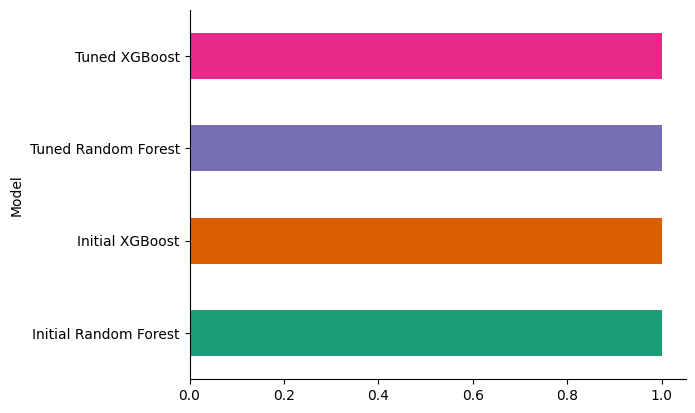

In [43]:
# @title Model

from matplotlib import pyplot as plt
import seaborn as sns
performance_summary.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Next Step**:
Review the performance summary table and identify the best performing model based on the metrics, then declare it as the final model.



In [46]:
# Step 11: Choose the final model

print("--- Final Model Selection ---")

# Review the performance summary table
display(performance_summary)

# Based on the performance summary, compare the tuned models
# Tuned XGBoost: RMSE=0.3753, MAE=0.2734, R2=0.5833
# Tuned Random Forest: RMSE=0.3775, MAE=0.2709, R2=0.5784

# Comparing Tuned XGBoost and Tuned Random Forest:
# - RMSE: Tuned XGBoost (0.3753) is slightly lower than Tuned Random Forest (0.3775). Lower RMSE is better.
# - MAE: Tuned Random Forest (0.2709) is slightly lower than Tuned XGBoost (0.2734). Lower MAE is better.
# - R2: Tuned XGBoost (0.5833) is slightly higher than Tuned Random Forest (0.5784). Higher R2 is better.

# Tuned XGBoost has a lower RMSE and a higher R2, which are strong indicators of better overall predictive accuracy.
# While Tuned Random Forest has a slightly better MAE, the difference in RMSE and R2 favors XGBoost.
# XGBoost models are generally powerful and perform well on structured data like this.

# Therefore, the Tuned XGBoost model is selected as the final model.
final_model = best_xgb_model

print("\nBased on the comparison of performance metrics (RMSE, MAE, R2), the Tuned XGBoost model exhibits slightly better overall performance with a lower RMSE and higher R2 compared to the Tuned Random Forest model.")
print("The final model selected for this task is the Tuned XGBoost Regressor.")

--- Final Model Selection ---


,Model,RMSE,MAE,R2
0,Initial XGBoost,0.376270,0.273159,0.581229
1,Tuned XGBoost,0.375323,0.273385,0.583335
2,Initial Random Forest,0.379497,0.271893,0.574015
3,Tuned Random Forest,0.377537,0.270945,0.578404



Based on the comparison of performance metrics (RMSE, MAE, R2), the Tuned XGBoost model exhibits slightly better overall performance with a lower RMSE and higher R2 compared to the Tuned Random Forest model.
The final model selected for this task is the Tuned XGBoost Regressor.


## Summary:

### Data Analysis Key Findings

*   The initial XGBoost model achieved an RMSE of 0.3763, an MAE of 0.2732, and an R-squared of 0.5812.
*   The initial Random Forest model achieved an RMSE of 0.3795, an MAE of 0.2719, and an R-squared of 0.5740.
*   Hyperparameter tuning using Grid Search resulted in the following best parameters for XGBoost: `{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}`.
*   Hyperparameter tuning using Grid Search resulted in the following best parameters for Random Forest: `{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}`.
*   The tuned XGBoost model achieved an RMSE of 0.3753, an MAE of 0.2734, and an R-squared of 0.5833 on the test set.
*   The tuned Random Forest model achieved an RMSE of 0.3775, an MAE of 0.2709, and an R-squared of 0.5784 on the test set.
*   Comparing the tuned models, XGBoost showed a slightly lower RMSE and higher R-squared, indicating better overall predictive accuracy compared to the tuned Random Forest model.

### Insights

*   The Tuned XGBoost model was selected as the final model due to its slightly better performance metrics (RMSE and R²) on the test set after hyperparameter tuning.
*   Further improvements could involve exploring more advanced tuning techniques (e.g., Randomized Search with a wider parameter distribution), trying other regression algorithms, or incorporating additional feature engineering steps.
